In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("D:\Heart Disease Prediction\Heart_disease_cleveland_new.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [27]:
df.shape

(303, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


<Axes: >

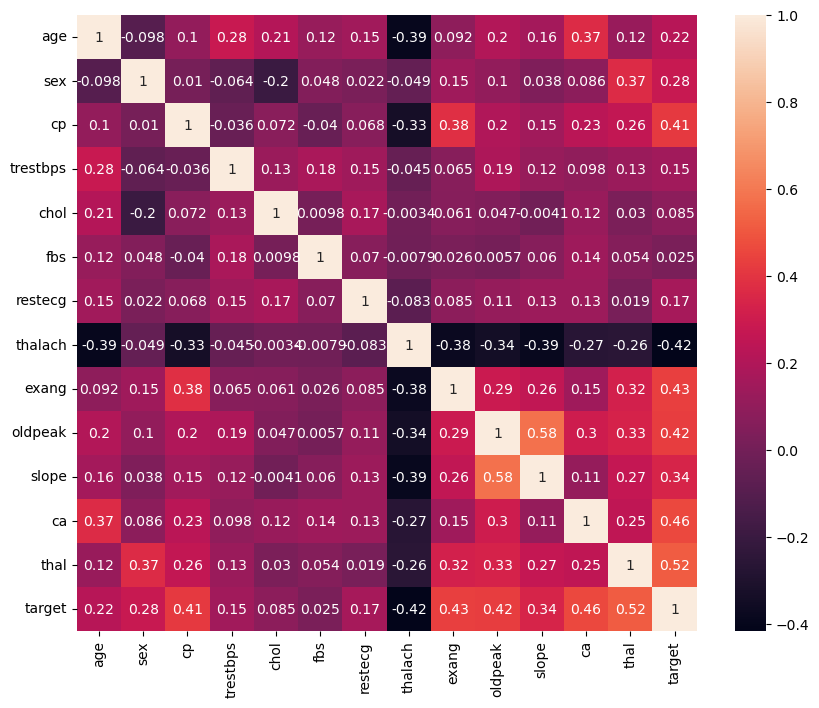

In [30]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [32]:
df['target'].value_countsounts()

0    164
1    139
Name: target, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Splitting the features and the target

In [33]:
x = df.drop(columns= 'target', axis =1)         #dropping column target
y = df['target']

## Splitting the training and test data

In [37]:
#Stratify is used to distribute the values in Y (i.e., target) evenly in both train and test 
# If we don't use stratify, one of the train or test contain all 0s or all 1s
# With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. 
# With random_state=0 , we get the same train and test sets across different executions.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y, random_state=2)

In [39]:
x.shape, x_train.shape, x_test.shape

((303, 13), (242, 13), (61, 13))

## Training the Model (Logistic Regression)

In [43]:
model = LogisticRegression()

In [44]:
# Training the model with train data
model.fit(x_train, y_train)

C:\Users\mshar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# evaluating the model accuracy on training data
x_train_prediction= model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [46]:
print(training_data_accuracy)

0.8636363636363636


In [47]:
# evaluating the model accuracy on test data
x_test_prediction= model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [48]:
print(test_data_accuracy)

0.8360655737704918


## Building a Predictive System

In [51]:
input_data = (67,1,3,160,286,0,2,108,1,1.5,1,3,1)
# change the input_data to numpy array
input_data_arr = np.array(input_data)
# reshape the array to instruct the model to predict for only the given input array and not the entire train data
input_data_reshaped =input_data_arr.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\mshar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
